## BigData101 :
## From Data to Big Data



#### Import libraries

In [1]:
import pandas as pd
import requests
import csv
from pymongo import MongoClient
import matplotlib.pyplot as plt

#### Extract data

In [2]:
url='http://api.coincap.io/v2/assets'

In [3]:
header={"Content-type":"application/json",
        "Accept-Encoding":"deflate"}

In [4]:
response = requests.get(url,headers=header)
print(response)

responseData= response.json()

<Response [200]>


In [5]:
df= pd.json_normalize(responseData,'data')
print(df)

                id rank symbol        name                         supply  \
0          bitcoin    1    BTC     Bitcoin      19573975.0000000000000000   
1         ethereum    2    ETH    Ethereum     120197888.7699193400000000   
2           tether    3   USDT      Tether   90912507793.9117400000000000   
3     binance-coin    4    BNB         BNB     166801148.0000000000000000   
4           solana    5    SOL      Solana     427720957.9796481000000000   
..             ...  ...    ...         ...                            ...   
95         zilliqa   96    ZIL     Zilliqa   17372203179.0000000000000000   
96  paxos-standard   97   USDP  Pax Dollar     369946003.6606834500000000   
97            dash   98   DASH        Dash      11584964.9603778000000000   
98            holo   99    HOT        Holo  172565515342.4079300000000000   
99        loopring  100    LRC    Loopring    1331682636.1413314000000000   

                       maxSupply                   marketCapUsd  \
0      2

In [6]:
df.to_csv(r'./APIdata.csv')

#### Mongodb Connection

In [7]:
client = MongoClient("mongodb://localhost:27017/")

In [8]:
# Create a new database named 'itcDB'
db = client.itcDB

In [9]:
# Specify the collection name
collection_name = 'data'

In [10]:
# Select or create the collection
collection = db[collection_name]

In [11]:
print(client.list_database_names())

['admin', 'config', 'local', 'test', 'website']


#### Loading

In [12]:
csv_file_path = '/home/tarek/Documents/codingStuffs/BigData101/DataITC.csv'

In [13]:
with open(csv_file_path, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.DictReader(file)

    # Iterate through each row in the CSV file
    for row in csv_reader:
        # Insert each row as a document in the MongoDB collection
        collection.insert_one(row)

In [14]:
print(f'Data from {csv_file_path} has been inserted into the {collection_name} collection in the itcDB database.')

Data from /home/tarek/Documents/codingStuffs/BigData101/DataITC.csv has been inserted into the data collection in the itcDB database.


In [15]:
print(client.list_database_names())

['admin', 'config', 'itcDB', 'local', 'test', 'website']


In [16]:
first_document = collection.find_one()
print(first_document)

{'_id': ObjectId('6580eaa5aa8b4aa206d0e4b3'), 'n': '1', 'n commande': '1015', 'date creation': '2022-03-01', 'date expedition': '2022-03-01', 'dernier statut': 'Retourne au vendeur', 'date dernier statut': '2022-03-10', 'date livraison/echec': '2022-03-06', 'prenom': '', 'nom': 'Alfredo', 'Gender': 'H', 'telephone': '7483588267', 'adresse': 'centre ville', 'commune': 'Ghardaia', 'wilaya': 'Ghardaia', 'designation': 'Lenovo Ideapad 110 15.6"- Intel Celeron N3060 - 500 Go - 2 Go - Noir - Freedos - Garantie 1 An', 'prix': '44900', 'type': 'pc', 'Brandt': 'Lenovo', 'frais livraison': '1050', 'freeshipping': 'oui', 'paiement': 'paye', 'id importation': '0', 'type colis': 'ecommerce', 'premiere tentative': 'Tentative echouee (Client absent (reporte))', 'date premiere tentative': '2022-03-03', 'deuxieme tentative': 'Tentative echouee (Client absent (reporte))', 'date deuxieme tentative': '2022-03-05', 'troisieme tentative': 'Echec livraison (Client absent (reporte))', 'date troisieme tentativ

In [17]:
df = pd.DataFrame(list(collection.find()))

In [18]:
df.head()

,_id,n,n commande,date creation,date expedition,dernier statut,date dernier statut,date livraison/echec,prenom,nom,...,freeshipping,paiement,id importation,type colis,premiere tentative,date premiere tentative,deuxieme tentative,date deuxieme tentative,troisieme tentative,date troisieme tentative
0,6580eaa5aa8b4aa206d0e4b3,1,1015,2022-03-01,2022-03-01,Retourne au vendeur,2022-03-10,2022-03-06,,Alfredo,...,oui,paye,0,ecommerce,Tentative echouee (Client absent (reporte)),2022-03-03,Tentative echouee (Client absent (reporte)),2022-03-05,Echec livraison (Client absent (reporte)),2022-03-06
1,6580eaa5aa8b4aa206d0e4b4,2,994,2022-03-01,2022-03-01,Livre,2022-03-03,2022-03-03,,Cara,...,oui,paye,0,ecommerce,Livre,2022-03-03,,,,
2,6580eaa5aa8b4aa206d0e4b5,3,985,2022-03-01,2022-03-01,Retourne au vendeur,2022-03-08,2022-03-03,,Torin,...,oui,paye,0,ecommerce,Echec livraison (Annule par le client),2022-03-03,,,,
3,6580eaa5aa8b4aa206d0e4b6,4,973,2022-03-01,2022-03-01,Livre,2022-03-02,2022-03-02,,Vale,...,oui,paye,0,ecommerce,Livre,2022-03-02,,,,
4,6580eaa5aa8b4aa206d0e4b7,5,#1120,2022-03-01,2022-03-01,Retourne au vendeur,2022-03-10,2022-03-06,,Gal,...,oui,paye,0,ecommerce,Tentative echouee (Client ne repond pas),2022-03-03,Tentative echouee (Telephone injoignable),2022-03-05,Echec livraison (Client ne repond pas),2022-03-06


#### Transformation

In [19]:
df.columns

Index(['_id', 'n', 'n commande', 'date creation', 'date expedition',
       'dernier statut', 'date dernier statut', 'date livraison/echec',
       'prenom', 'nom', 'Gender', 'telephone', 'adresse', 'commune', 'wilaya',
       'designation', 'prix', 'type', 'Brandt', 'frais livraison',
       'freeshipping', 'paiement', 'id importation', 'type colis',
       'premiere tentative', 'date premiere tentative', 'deuxieme tentative',
       'date deuxieme tentative', 'troisieme tentative',
       'date troisieme tentative'],
      dtype='object')

In [20]:
columns_to_delete = ['premiere tentative', 'date premiere tentative', 'deuxieme tentative',
                      'date deuxieme tentative', 'troisieme tentative', 'date troisieme tentative']

# Drop specified columns
df = df.drop(columns=columns_to_delete, errors='ignore')

In [21]:
df.columns

Index(['_id', 'n', 'n commande', 'date creation', 'date expedition',
       'dernier statut', 'date dernier statut', 'date livraison/echec',
       'prenom', 'nom', 'Gender', 'telephone', 'adresse', 'commune', 'wilaya',
       'designation', 'prix', 'type', 'Brandt', 'frais livraison',
       'freeshipping', 'paiement', 'id importation', 'type colis'],
      dtype='object')

In [22]:
df['full_name'] = df['prenom'] + ' ' + df['nom']

# Drop the original 'prenom' and 'nom' columns
df = df.drop(columns=['prenom', 'nom'], errors='ignore')

In [23]:
# Drop rows where 'telephone' column is empty
df = df.dropna(subset=['telephone'])

In [24]:
df['Gender'] = df['Gender'].apply(lambda x: 'Undefined' if x not in ['H', 'F'] else x)

In [25]:
pipeline=[
    {"$match": {"dernier statut": "Livre"}}, 
    {"$group" : {"_id" : "$type", "nbrventes" : {"$sum" : 1}}} 
]

In [26]:
result =list(collection.aggregate(pipeline))
print (result)

[{'_id': 'Mode Femme', 'nbrventes': 51}, {'_id': 'tv', 'nbrventes': 35}, {'_id': 'Parfums', 'nbrventes': 28}, {'_id': 'imprimantes', 'nbrventes': 20}, {'_id': 'audio', 'nbrventes': 23}, {'_id': 'Mode Homme', 'nbrventes': 43}, {'_id': 'pc', 'nbrventes': 28}, {'_id': 'Electronique Embarquee', 'nbrventes': 18}, {'_id': 'stockage', 'nbrventes': 11}, {'_id': 'sport', 'nbrventes': 21}]


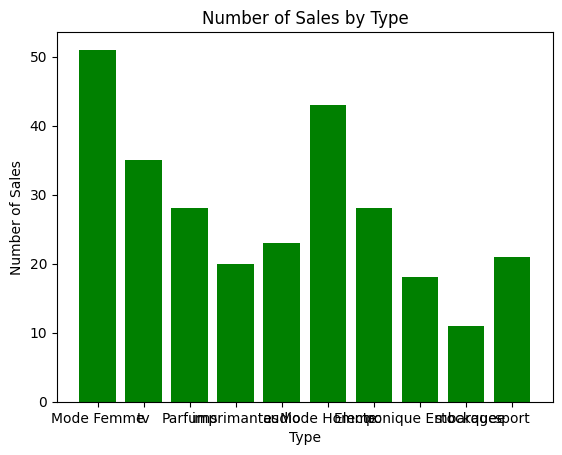

In [27]:
type_labels = [entry['_id'] for entry in result]
nbrventes_values = [entry['nbrventes'] for entry in result]

# Plot the bar chart
plt.bar(type_labels, nbrventes_values, color='green')
plt.xlabel('Type')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Type')
plt.show()